In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('./drive/My Drive/ERA5_Dataset')

Mounted at /content/drive


In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

import pickle
import metrics
import datashift

# Evaluate variable distribution over 4 geogrphical zones

## KDE for Wind Gust

In [5]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [35]:
df_wind = pd.read_csv('./csv/16_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_wind = df_wind[atts]
df_wind

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
0,1980-01-12,5.381555,9.447551,7.961275,8.514588,5.209139,9.588754,8.850654,7.066307,7.443629,7.448700,7.617693,9.689114,8.407108,11.876979,13.182545,11.520491
1,1980-01-13,5.792269,8.198696,5.636487,7.839208,4.452687,10.131536,7.299232,7.484996,5.693313,6.635979,7.893997,11.094159,6.894467,10.570286,12.959018,10.963511
2,1980-01-14,5.127522,6.858602,6.426326,8.731751,4.203879,9.410537,7.404046,7.026360,5.649755,6.239395,9.714540,11.997676,7.366055,7.963233,12.529026,10.867162
3,1980-01-15,5.498013,7.926597,7.692457,9.441629,4.977519,8.847863,6.904106,6.023536,7.974710,6.600487,10.189182,11.671708,8.374872,8.049296,10.785515,9.882605
4,1980-01-16,5.236773,6.309575,6.783029,8.846063,4.891237,9.515797,6.958692,6.946209,6.746197,7.061572,8.670515,10.487875,10.438202,12.249752,10.106409,8.857058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,5.072216,5.048309,7.381640,8.071348,4.449345,7.762067,7.338914,10.925027,5.241772,7.124804,10.965459,14.312355,8.614813,8.715650,8.135213,11.752892
15412,2022-03-24,5.248760,6.139183,10.720927,7.240363,4.121002,6.730859,8.647804,9.509389,3.520406,7.205750,10.681937,13.185038,6.638721,9.263336,8.099617,9.692260
15413,2022-03-25,4.138962,5.889070,11.888296,6.964813,3.311742,5.884970,9.942068,9.837467,3.502117,5.689877,11.939477,12.121048,6.474759,8.066953,10.361195,10.604379
15414,2022-03-26,4.439019,5.000400,9.889843,5.914646,3.403260,5.553199,9.697565,9.070245,4.441054,5.618417,12.497691,12.738067,6.225199,6.232589,9.879186,12.419699


In [37]:
wind_zones = []
zones_flag = []
N_samples = len(df_wind)

for att in mean_n_zones(16):
  wind_zones.append(df_wind[att].values)

for i in range(16):
  zones_flag.append(np.full(N_samples, i+1))

wind_arr = np.concatenate(wind_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Zone
0,5.381555,1
1,5.792269,1
2,5.127522,1
3,5.498013,1
4,5.236773,1
...,...,...
246651,11.752892,16
246652,9.692260,16
246653,10.604379,16
246654,12.419699,16


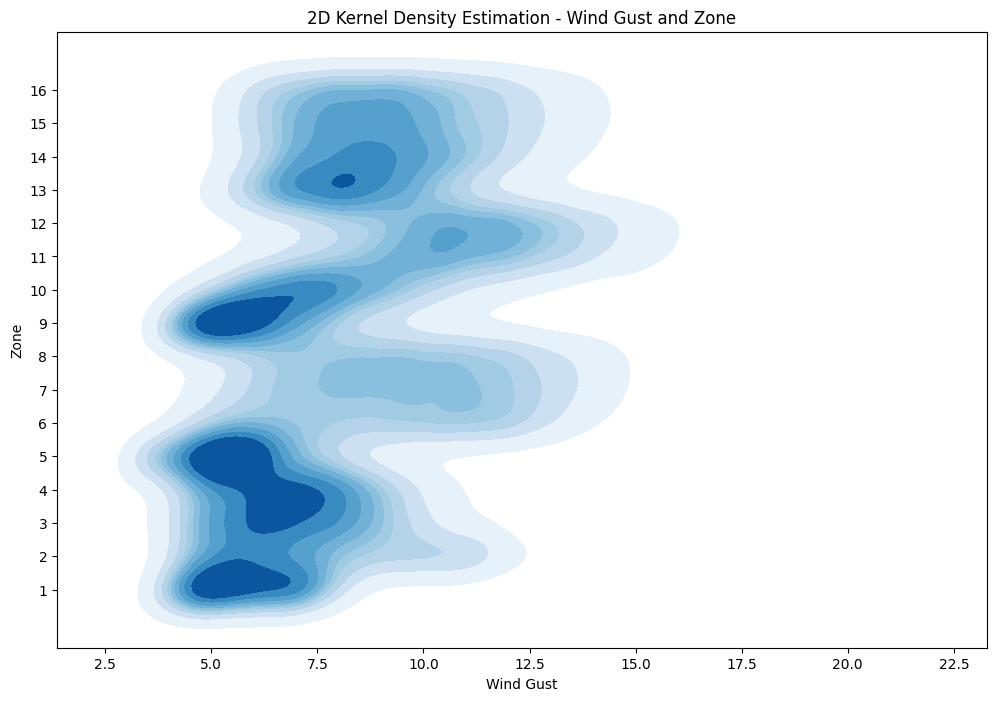

In [38]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Wind Gust and Zone')
plt.xlabel('Wind Gust')
plt.ylabel('Zone')

plt.show()

## KDE for pressure

In [20]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [21]:
df_press = pd.read_csv('./csv/16_zones/pressure_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_press = df_press[atts]
df_press

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
0,1980-01-12,100998.387751,100916.290217,100938.747542,100923.958320,100964.057154,100687.274847,100769.403505,100899.129543,100924.676968,100492.540921,100826.034907,101066.590403,101122.778378,100562.584448,101391.355399,101693.747301
1,1980-01-13,101027.665055,100975.603963,100956.563666,100911.164915,101053.131929,100828.738741,100848.100066,100840.766529,101009.139853,100727.577032,100937.942707,101157.684188,101079.379996,100808.156959,101528.362474,101834.883442
2,1980-01-14,101119.437077,101137.091576,101035.567753,100919.507799,101139.031002,100947.139728,100905.283449,100887.396816,101182.713329,100849.192254,101009.547499,101267.406358,101500.602260,101099.435706,101544.990986,101929.692029
3,1980-01-15,101184.010287,101094.062338,101081.706494,101049.950393,101240.403573,100955.652288,100980.859062,100999.255000,101318.037588,100884.294176,101105.017727,101365.975664,101667.250317,101212.524102,101550.879581,102032.417940
4,1980-01-16,101230.576023,101132.475157,101068.880594,101012.121292,101238.213846,100973.879846,100977.112113,101017.328224,101257.823331,100862.567747,101034.542010,101334.821209,101575.975055,101286.188238,101293.551631,101917.959388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,101261.177785,100934.833368,100811.079632,100830.873730,101367.612625,101019.391434,100810.579770,100699.915739,101471.400524,101360.966622,101145.362727,101164.759231,101737.637770,101738.604448,101652.431579,101887.217488
15412,2022-03-24,101239.688484,100953.367133,100768.198105,100776.396115,101356.877731,100966.759176,100648.258340,100584.867587,101350.019878,101245.905433,100953.188382,100930.780929,101302.238113,101550.433054,101501.307668,101580.115279
15413,2022-03-25,101133.947820,100821.787107,100749.144634,100815.530148,101152.207571,100845.595403,100481.796229,100660.700720,101042.597359,101069.724704,100788.794883,100936.710826,100911.151644,101172.022886,101432.864408,101546.724971
15414,2022-03-26,101032.107744,100836.881284,100825.559334,100996.815855,100995.698079,100829.390184,100612.370109,100944.188290,100983.896769,101032.814023,100762.586079,101036.893540,101218.606878,101105.607644,101403.427725,101714.544188


In [31]:
press_zones = []
zones_flag = []
N_samples = len(df_press)

for att in mean_n_zones(16):
  press_zones.append(df_press[att].values)

for i in range(16):
  zones_flag.append(np.full(N_samples, i+1))

press_arr = np.concatenate(press_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Pressure': press_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Pressure,Zone
0,100998.387751,1
1,101027.665055,1
2,101119.437077,1
3,101184.010287,1
4,101230.576023,1
...,...,...
246651,101887.217488,16
246652,101580.115279,16
246653,101546.724971,16
246654,101714.544188,16


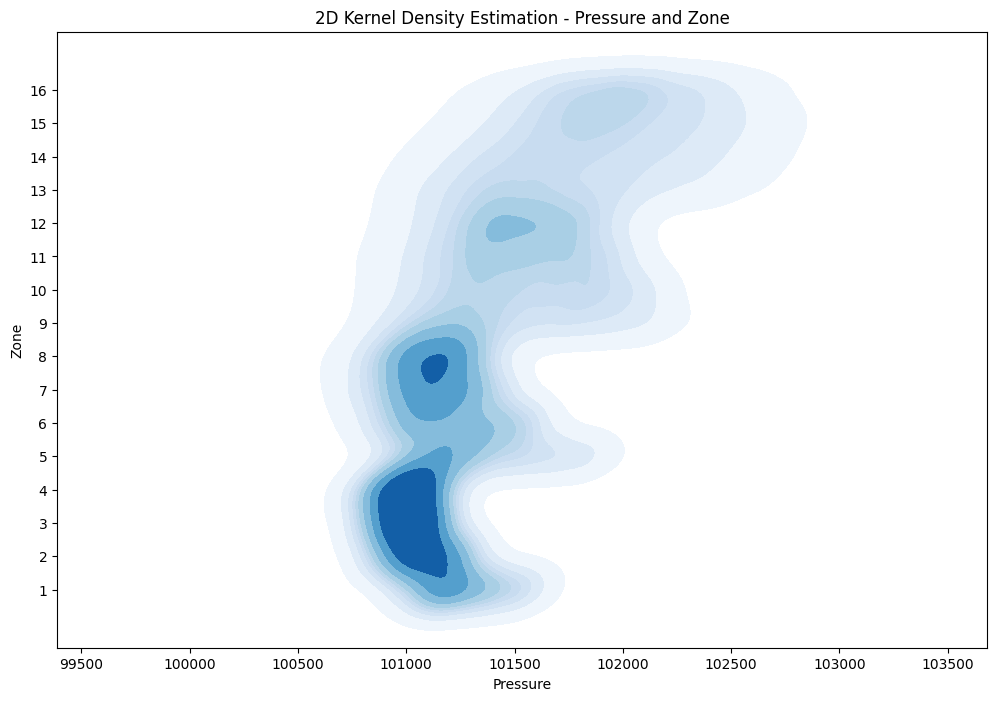

In [32]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Pressure', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Pressure and Zone')
plt.xlabel('Pressure')
plt.ylabel('Zone')

plt.show()

## KDE for Sea Surface Temperature

In [8]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [9]:
df_temp = pd.read_csv('./csv/16_zones/temperature_1000hPa_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_temp = df_temp[atts]
df_temp

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
0,1980-01-12,300.253413,298.531153,298.596706,298.735289,298.937415,298.974125,298.652013,298.355137,298.014135,298.748125,298.247029,297.298759,295.895615,297.648605,296.062257,293.632294
1,1980-01-13,300.127137,298.792916,298.411591,298.668281,298.726484,298.983773,298.627282,298.579940,298.297545,298.558945,298.021434,296.928193,296.675954,297.414098,296.162845,293.007657
2,1980-01-14,300.190530,298.738340,298.155103,298.513585,299.149170,298.845801,298.182967,298.368856,298.595791,298.184968,298.031768,297.046366,296.253545,296.555578,295.939709,293.203996
3,1980-01-15,299.978753,298.771450,298.353609,298.243897,299.007838,298.951050,298.138240,298.274591,298.055049,298.408889,298.052342,297.124439,295.803143,296.125514,296.119923,293.399859
4,1980-01-16,299.828443,298.635029,298.657462,298.526317,298.776324,298.716668,298.094730,298.512508,298.103814,298.525258,298.264864,297.613033,296.299312,295.265928,296.640667,294.577331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,299.746285,300.281745,299.925090,300.227190,298.794554,299.724603,299.833610,299.401010,297.428721,298.777884,299.386022,298.047879,296.103493,296.385486,296.331241,294.771936
15412,2022-03-24,300.828877,300.320365,299.673818,300.357425,299.599344,299.608834,300.035438,299.635244,298.373022,298.885208,299.244645,297.942863,297.194101,296.519539,296.186074,294.785922
15413,2022-03-25,301.159061,300.547618,299.913533,300.283153,300.610301,299.700925,300.213211,299.604534,299.781044,298.972277,299.015904,298.051939,298.211381,297.444968,296.158612,294.440751
15414,2022-03-26,301.318960,300.560331,299.728831,300.336257,301.227322,300.106468,300.238552,299.288899,300.001759,299.201882,299.187787,298.259214,296.608953,297.387398,296.206937,294.851506


In [10]:
sst_zones = []
zones_flag = []
N_samples = len(df_temp)

for att in mean_n_zones(16):
  sst_zones.append(df_temp[att].values - 273.15)

for i in range(16):
  zones_flag.append(np.full(N_samples, i+1))

sst_arr = np.concatenate(sst_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'SST': sst_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,SST,Zone
0,27.103413,1
1,26.977137,1
2,27.040530,1
3,26.828753,1
4,26.678443,1
...,...,...
246651,21.621936,16
246652,21.635922,16
246653,21.290751,16
246654,21.701506,16


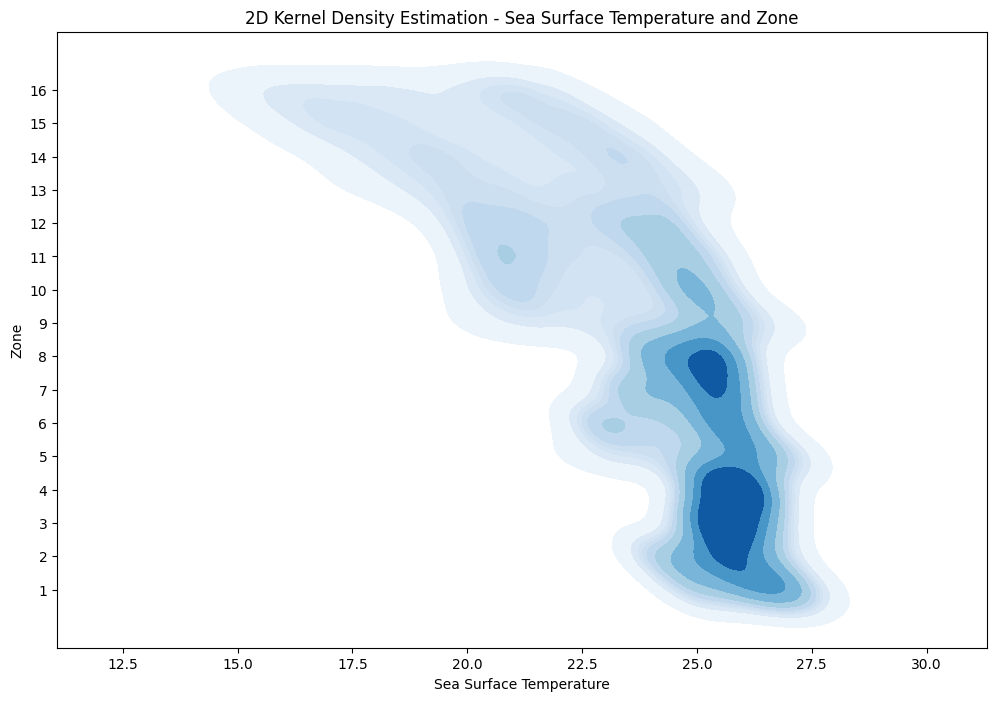

In [11]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='SST', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Sea Surface Temperature and Zone')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Zone')

plt.show()

# Evaluate variables distribution over weeks of the year

## Wind Gust

In [8]:
df_wind = pd.read_csv('./csv/16_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_wind = df_wind[atts]
df_wind = df_wind.set_index('DATE')
df_wind

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
DATE,,,,,,,,,,,,,,,,
1980-01-12,5.381555,9.447551,7.961275,8.514588,5.209139,9.588754,8.850654,7.066307,7.443629,7.448700,7.617693,9.689114,8.407108,11.876979,13.182545,11.520491
1980-01-13,5.792269,8.198696,5.636487,7.839208,4.452687,10.131536,7.299232,7.484996,5.693313,6.635979,7.893997,11.094159,6.894467,10.570286,12.959018,10.963511
1980-01-14,5.127522,6.858602,6.426326,8.731751,4.203879,9.410537,7.404046,7.026360,5.649755,6.239395,9.714540,11.997676,7.366055,7.963233,12.529026,10.867162
1980-01-15,5.498013,7.926597,7.692457,9.441629,4.977519,8.847863,6.904106,6.023536,7.974710,6.600487,10.189182,11.671708,8.374872,8.049296,10.785515,9.882605
1980-01-16,5.236773,6.309575,6.783029,8.846063,4.891237,9.515797,6.958692,6.946209,6.746197,7.061572,8.670515,10.487875,10.438202,12.249752,10.106409,8.857058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,5.072216,5.048309,7.381640,8.071348,4.449345,7.762067,7.338914,10.925027,5.241772,7.124804,10.965459,14.312355,8.614813,8.715650,8.135213,11.752892
2022-03-24,5.248760,6.139183,10.720927,7.240363,4.121002,6.730859,8.647804,9.509389,3.520406,7.205750,10.681937,13.185038,6.638721,9.263336,8.099617,9.692260
2022-03-25,4.138962,5.889070,11.888296,6.964813,3.311742,5.884970,9.942068,9.837467,3.502117,5.689877,11.939477,12.121048,6.474759,8.066953,10.361195,10.604379


In [9]:
dates = df_wind.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [10]:
df_wind['WEEK'] = week_number_arr
df_wind

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0,WEEK
DATE,,,,,,,,,,,,,,,,,
1980-01-12,5.381555,9.447551,7.961275,8.514588,5.209139,9.588754,8.850654,7.066307,7.443629,7.448700,7.617693,9.689114,8.407108,11.876979,13.182545,11.520491,2
1980-01-13,5.792269,8.198696,5.636487,7.839208,4.452687,10.131536,7.299232,7.484996,5.693313,6.635979,7.893997,11.094159,6.894467,10.570286,12.959018,10.963511,2
1980-01-14,5.127522,6.858602,6.426326,8.731751,4.203879,9.410537,7.404046,7.026360,5.649755,6.239395,9.714540,11.997676,7.366055,7.963233,12.529026,10.867162,3
1980-01-15,5.498013,7.926597,7.692457,9.441629,4.977519,8.847863,6.904106,6.023536,7.974710,6.600487,10.189182,11.671708,8.374872,8.049296,10.785515,9.882605,3
1980-01-16,5.236773,6.309575,6.783029,8.846063,4.891237,9.515797,6.958692,6.946209,6.746197,7.061572,8.670515,10.487875,10.438202,12.249752,10.106409,8.857058,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,5.072216,5.048309,7.381640,8.071348,4.449345,7.762067,7.338914,10.925027,5.241772,7.124804,10.965459,14.312355,8.614813,8.715650,8.135213,11.752892,12
2022-03-24,5.248760,6.139183,10.720927,7.240363,4.121002,6.730859,8.647804,9.509389,3.520406,7.205750,10.681937,13.185038,6.638721,9.263336,8.099617,9.692260,12
2022-03-25,4.138962,5.889070,11.888296,6.964813,3.311742,5.884970,9.942068,9.837467,3.502117,5.689877,11.939477,12.121048,6.474759,8.066953,10.361195,10.604379,12


In [11]:
wind_zones_arr = []
zones_flag = []

for i in range(16):
  wind_zones_arr.append(df_wind['Mean_Z{}-0'.format(i+1)].values)

for i in range(16):
  zones_flag.append(df_wind['WEEK'].values)

wind_arr = np.concatenate(wind_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Week
0,5.381555,2
1,5.792269,2
2,5.127522,3
3,5.498013,3
4,5.236773,3
...,...,...
246651,11.752892,12
246652,9.692260,12
246653,10.604379,12
246654,12.419699,12


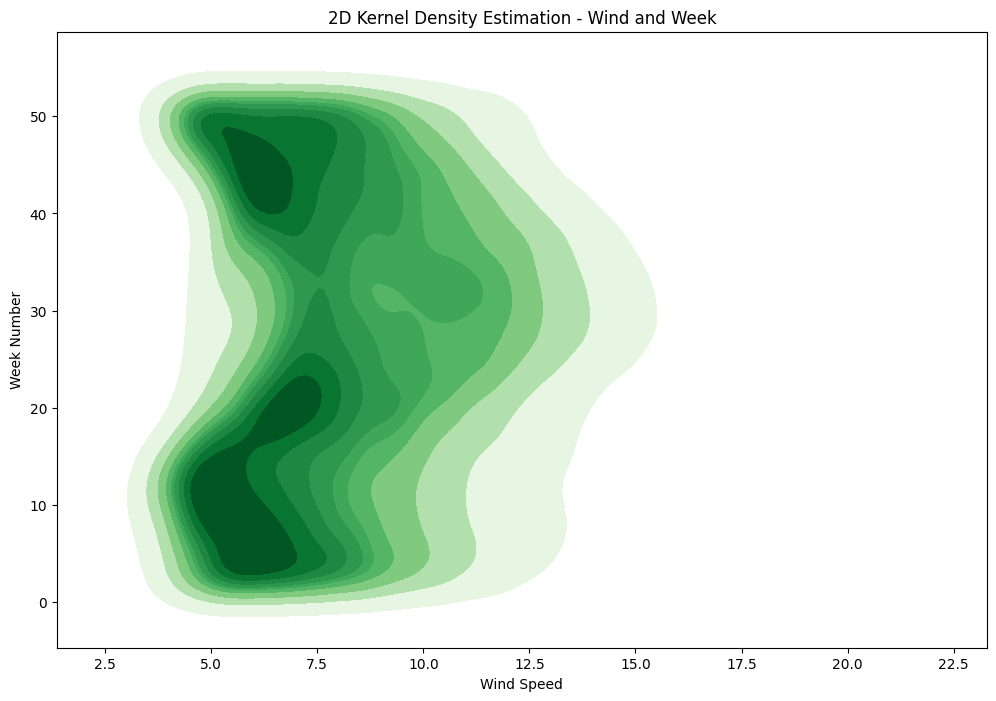

In [12]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Week', data=df_kde, cmap="Greens", fill=True)

# Set custom y-axis tick values
#custom_y_ticks = [1, 2, 3, 4]
#plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Wind and Week')
plt.xlabel('Wind Speed')
plt.ylabel('Week Number')

plt.show()

## Pressure

In [13]:
df_press = pd.read_csv('./csv/16_zones/pressure_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_press = df_press[atts]
df_press = df_press.set_index('DATE')
df_press

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
DATE,,,,,,,,,,,,,,,,
1980-01-12,100998.387751,100916.290217,100938.747542,100923.958320,100964.057154,100687.274847,100769.403505,100899.129543,100924.676968,100492.540921,100826.034907,101066.590403,101122.778378,100562.584448,101391.355399,101693.747301
1980-01-13,101027.665055,100975.603963,100956.563666,100911.164915,101053.131929,100828.738741,100848.100066,100840.766529,101009.139853,100727.577032,100937.942707,101157.684188,101079.379996,100808.156959,101528.362474,101834.883442
1980-01-14,101119.437077,101137.091576,101035.567753,100919.507799,101139.031002,100947.139728,100905.283449,100887.396816,101182.713329,100849.192254,101009.547499,101267.406358,101500.602260,101099.435706,101544.990986,101929.692029
1980-01-15,101184.010287,101094.062338,101081.706494,101049.950393,101240.403573,100955.652288,100980.859062,100999.255000,101318.037588,100884.294176,101105.017727,101365.975664,101667.250317,101212.524102,101550.879581,102032.417940
1980-01-16,101230.576023,101132.475157,101068.880594,101012.121292,101238.213846,100973.879846,100977.112113,101017.328224,101257.823331,100862.567747,101034.542010,101334.821209,101575.975055,101286.188238,101293.551631,101917.959388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,101261.177785,100934.833368,100811.079632,100830.873730,101367.612625,101019.391434,100810.579770,100699.915739,101471.400524,101360.966622,101145.362727,101164.759231,101737.637770,101738.604448,101652.431579,101887.217488
2022-03-24,101239.688484,100953.367133,100768.198105,100776.396115,101356.877731,100966.759176,100648.258340,100584.867587,101350.019878,101245.905433,100953.188382,100930.780929,101302.238113,101550.433054,101501.307668,101580.115279
2022-03-25,101133.947820,100821.787107,100749.144634,100815.530148,101152.207571,100845.595403,100481.796229,100660.700720,101042.597359,101069.724704,100788.794883,100936.710826,100911.151644,101172.022886,101432.864408,101546.724971


In [14]:
dates = df_press.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [15]:
df_press['WEEK'] = week_number_arr
df_press

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0,WEEK
DATE,,,,,,,,,,,,,,,,,
1980-01-12,100998.387751,100916.290217,100938.747542,100923.958320,100964.057154,100687.274847,100769.403505,100899.129543,100924.676968,100492.540921,100826.034907,101066.590403,101122.778378,100562.584448,101391.355399,101693.747301,2
1980-01-13,101027.665055,100975.603963,100956.563666,100911.164915,101053.131929,100828.738741,100848.100066,100840.766529,101009.139853,100727.577032,100937.942707,101157.684188,101079.379996,100808.156959,101528.362474,101834.883442,2
1980-01-14,101119.437077,101137.091576,101035.567753,100919.507799,101139.031002,100947.139728,100905.283449,100887.396816,101182.713329,100849.192254,101009.547499,101267.406358,101500.602260,101099.435706,101544.990986,101929.692029,3
1980-01-15,101184.010287,101094.062338,101081.706494,101049.950393,101240.403573,100955.652288,100980.859062,100999.255000,101318.037588,100884.294176,101105.017727,101365.975664,101667.250317,101212.524102,101550.879581,102032.417940,3
1980-01-16,101230.576023,101132.475157,101068.880594,101012.121292,101238.213846,100973.879846,100977.112113,101017.328224,101257.823331,100862.567747,101034.542010,101334.821209,101575.975055,101286.188238,101293.551631,101917.959388,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,101261.177785,100934.833368,100811.079632,100830.873730,101367.612625,101019.391434,100810.579770,100699.915739,101471.400524,101360.966622,101145.362727,101164.759231,101737.637770,101738.604448,101652.431579,101887.217488,12
2022-03-24,101239.688484,100953.367133,100768.198105,100776.396115,101356.877731,100966.759176,100648.258340,100584.867587,101350.019878,101245.905433,100953.188382,100930.780929,101302.238113,101550.433054,101501.307668,101580.115279,12
2022-03-25,101133.947820,100821.787107,100749.144634,100815.530148,101152.207571,100845.595403,100481.796229,100660.700720,101042.597359,101069.724704,100788.794883,100936.710826,100911.151644,101172.022886,101432.864408,101546.724971,12


In [17]:
press_zones_arr = []
zones_flag = []

for i in range(16):
  press_zones_arr.append(df_press['Mean_Z{}-0'.format(i+1)].values)

for i in range(16):
  zones_flag.append(df_wind['WEEK'].values)

press_arr = np.concatenate(press_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Pressure': press_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Pressure,Week
0,100998.387751,2
1,101027.665055,2
2,101119.437077,3
3,101184.010287,3
4,101230.576023,3
...,...,...
246651,101887.217488,12
246652,101580.115279,12
246653,101546.724971,12
246654,101714.544188,12


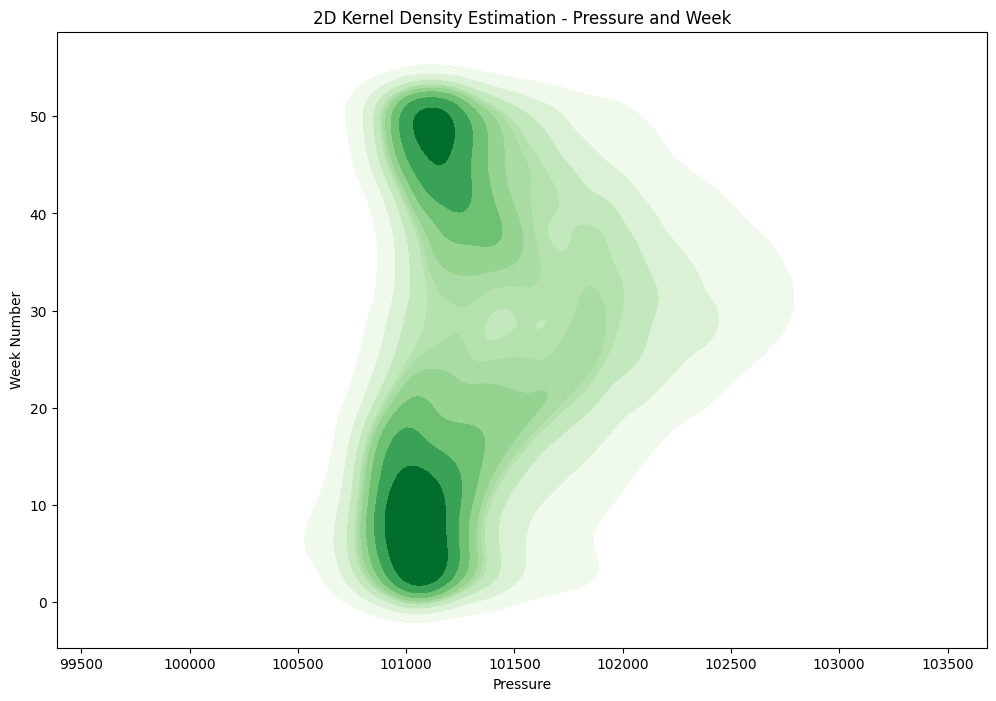

In [18]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Pressure', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Pressure and Week')
plt.xlabel('Pressure')
plt.ylabel('Week Number')

plt.show()

## Sea Surface Temperature

In [19]:
df_temp = pd.read_csv('./csv/16_zones/temperature_1000hPa_10D.csv')
atts = ['DATE'] + mean_n_zones(16)
df_temp = df_temp[atts]
df_temp = df_temp.set_index('DATE')
df_temp

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0
DATE,,,,,,,,,,,,,,,,
1980-01-12,300.253413,298.531153,298.596706,298.735289,298.937415,298.974125,298.652013,298.355137,298.014135,298.748125,298.247029,297.298759,295.895615,297.648605,296.062257,293.632294
1980-01-13,300.127137,298.792916,298.411591,298.668281,298.726484,298.983773,298.627282,298.579940,298.297545,298.558945,298.021434,296.928193,296.675954,297.414098,296.162845,293.007657
1980-01-14,300.190530,298.738340,298.155103,298.513585,299.149170,298.845801,298.182967,298.368856,298.595791,298.184968,298.031768,297.046366,296.253545,296.555578,295.939709,293.203996
1980-01-15,299.978753,298.771450,298.353609,298.243897,299.007838,298.951050,298.138240,298.274591,298.055049,298.408889,298.052342,297.124439,295.803143,296.125514,296.119923,293.399859
1980-01-16,299.828443,298.635029,298.657462,298.526317,298.776324,298.716668,298.094730,298.512508,298.103814,298.525258,298.264864,297.613033,296.299312,295.265928,296.640667,294.577331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,299.746285,300.281745,299.925090,300.227190,298.794554,299.724603,299.833610,299.401010,297.428721,298.777884,299.386022,298.047879,296.103493,296.385486,296.331241,294.771936
2022-03-24,300.828877,300.320365,299.673818,300.357425,299.599344,299.608834,300.035438,299.635244,298.373022,298.885208,299.244645,297.942863,297.194101,296.519539,296.186074,294.785922
2022-03-25,301.159061,300.547618,299.913533,300.283153,300.610301,299.700925,300.213211,299.604534,299.781044,298.972277,299.015904,298.051939,298.211381,297.444968,296.158612,294.440751


In [20]:
dates = df_temp.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [21]:
df_temp['WEEK'] = week_number_arr
df_temp

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,Mean_Z11-0,Mean_Z12-0,Mean_Z13-0,Mean_Z14-0,Mean_Z15-0,Mean_Z16-0,WEEK
DATE,,,,,,,,,,,,,,,,,
1980-01-12,300.253413,298.531153,298.596706,298.735289,298.937415,298.974125,298.652013,298.355137,298.014135,298.748125,298.247029,297.298759,295.895615,297.648605,296.062257,293.632294,2
1980-01-13,300.127137,298.792916,298.411591,298.668281,298.726484,298.983773,298.627282,298.579940,298.297545,298.558945,298.021434,296.928193,296.675954,297.414098,296.162845,293.007657,2
1980-01-14,300.190530,298.738340,298.155103,298.513585,299.149170,298.845801,298.182967,298.368856,298.595791,298.184968,298.031768,297.046366,296.253545,296.555578,295.939709,293.203996,3
1980-01-15,299.978753,298.771450,298.353609,298.243897,299.007838,298.951050,298.138240,298.274591,298.055049,298.408889,298.052342,297.124439,295.803143,296.125514,296.119923,293.399859,3
1980-01-16,299.828443,298.635029,298.657462,298.526317,298.776324,298.716668,298.094730,298.512508,298.103814,298.525258,298.264864,297.613033,296.299312,295.265928,296.640667,294.577331,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,299.746285,300.281745,299.925090,300.227190,298.794554,299.724603,299.833610,299.401010,297.428721,298.777884,299.386022,298.047879,296.103493,296.385486,296.331241,294.771936,12
2022-03-24,300.828877,300.320365,299.673818,300.357425,299.599344,299.608834,300.035438,299.635244,298.373022,298.885208,299.244645,297.942863,297.194101,296.519539,296.186074,294.785922,12
2022-03-25,301.159061,300.547618,299.913533,300.283153,300.610301,299.700925,300.213211,299.604534,299.781044,298.972277,299.015904,298.051939,298.211381,297.444968,296.158612,294.440751,12


In [22]:
press_zones_arr = []
zones_flag = []

for i in range(16):
  press_zones_arr.append(df_temp['Mean_Z{}-0'.format(i+1)].values)

for i in range(16):
  zones_flag.append(df_temp['WEEK'].values)

temp_arr = np.concatenate(press_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Temperature': temp_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Temperature,Week
0,300.253413,2
1,300.127137,2
2,300.190530,3
3,299.978753,3
4,299.828443,3
...,...,...
246651,294.771936,12
246652,294.785922,12
246653,294.440751,12
246654,294.851506,12


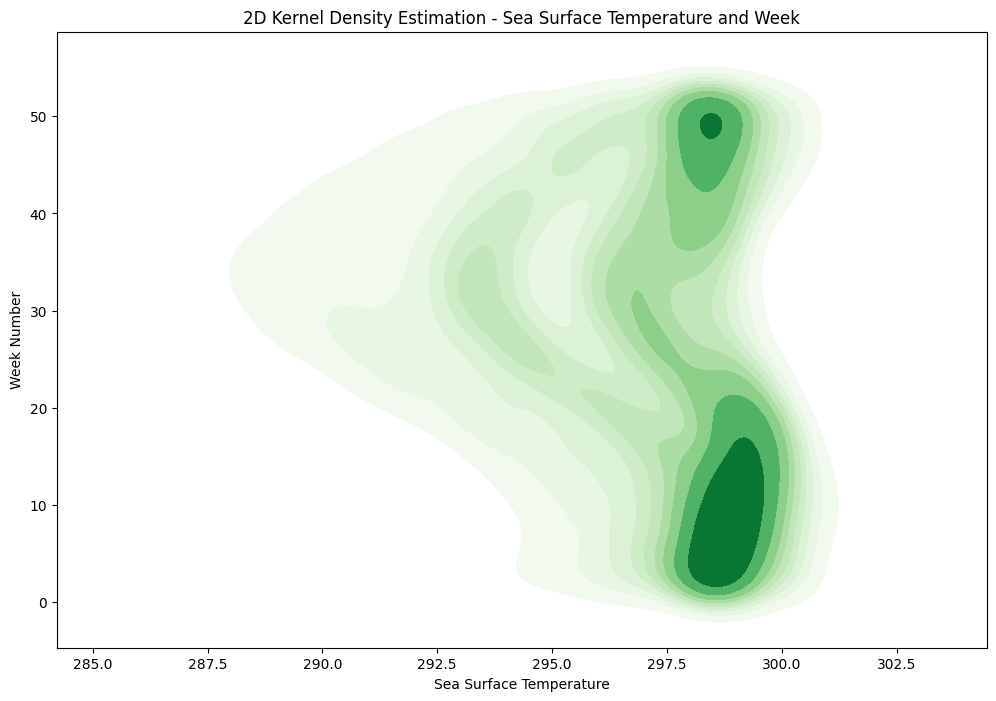

In [23]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Temperature', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Sea Surface Temperature and Week')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Week Number')

plt.show()